# Bias vs. Variance

## LinearRegCostFunction

In [25]:
%%file linearRegCostFunction.m

function [J, grad] = linearRegCostFunction(X, y, theta, lambda)
%LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear 
%regression with multiple variables
%   [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, lambda) computes the 
%   cost of using theta as the parameter for linear regression to fit the 
%   data points in X and y. Returns the cost in J and the gradient in grad

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost and gradient of regularized linear 
%               regression for a particular choice of theta.
%
%               You should set J to the cost and grad to the gradient.
%

yErr = X * theta -y ;

J = (sum( yErr.^2 ) + 
         theta(2:end)'*theta(2:end) * lambda
     ) / (2*m);

% dims of grad are ...m x size(theta)
%grad =  sum((X*theta - y) .* X) / m ;
grad = X' * yErr / m; %%% this fixed my error !!!!
grad(2:end) +=  (lambda/m) *  theta(2:end) ;
% =========================================================================

grad = grad(:);

end


Created file '/Users/jlatmann/Programming/octave/machine-learning-ex5/ex5/linearRegCostFunction.m'.


In [15]:
[0 [1 2 3]]'

ans =

   0
   1
   2
   3



In [26]:
  X = [ones(10,1) sin(1:1.5:15)' cos(1:1.5:15)'];
  y = sin(1:3:30)';

[J,grad] = linearRegCostFunction(X, y, [0.1 0.2 0.3]', 1)

J =  0.14181
grad =

   0.070710
   0.110905
   0.134227



# Submit

In [ ]:
function submit()
  addpath('./lib');

  conf.assignmentSlug = 'regularized-linear-regression-and-bias-variance';
  conf.itemName = 'Regularized Linear Regression and Bias/Variance';
  conf.partArrays = { ...
    { ...
      '1', ...
      { 'linearRegCostFunction.m' }, ...
      'Regularized Linear Regression Cost Function', ...
    }, ...
    { ...
      '2', ...
      { 'linearRegCostFunction.m' }, ...
      'Regularized Linear Regression Gradient', ...
    }, ...
    { ...
      '3', ...
      { 'learningCurve.m' }, ...
      'Learning Curve', ...
    }, ...
    { ...
      '4', ...
      { 'polyFeatures.m' }, ...
      'Polynomial Feature Mapping', ...
    }, ...
    { ...
      '5', ...
      { 'validationCurve.m' }, ...
      'Validation Curve', ...
    }, ...
  };
  conf.output = @output;

  submitWithConfiguration(conf);
end

function out = output(partId, auxstring)
  % Random Test Cases
  X = [ones(10,1) sin(1:1.5:15)' cos(1:1.5:15)'];
  y = sin(1:3:30)';
  Xval = [ones(10,1) sin(0:1.5:14)' cos(0:1.5:14)'];
  yval = sin(1:10)';
  if partId == '1'
    [J] = linearRegCostFunction(X, y, [0.1 0.2 0.3]', 0.5);
    out = sprintf('%0.5f ', J);
  elseif partId == '2'
    [J, grad] = linearRegCostFunction(X, y, [0.1 0.2 0.3]', 0.5);
    out = sprintf('%0.5f ', grad);
  elseif partId == '3'
    [error_train, error_val] = ...
        learningCurve(X, y, Xval, yval, 1);
    out = sprintf('%0.5f ', [error_train(:); error_val(:)]);
  elseif partId == '4'
    [X_poly] = polyFeatures(X(2,:)', 8);
    out = sprintf('%0.5f ', X_poly);
  elseif partId == '5'
    [lambda_vec, error_train, error_val] = ...
        validationCurve(X, y, Xval, yval);
    out = sprintf('%0.5f ', ...
        [lambda_vec(:); error_train(:); error_val(:)]);
  end 
end


In [ ]:
%load trainLinearReg.m

## trainLinearReg(X,y,lambda)

In [ ]:


function [theta] = trainLinearReg(X, y, lambda)
%TRAINLINEARREG Trains linear regression given a dataset (X, y) and a
%regularization parameter lambda
%   [theta] = TRAINLINEARREG (X, y, lambda) trains linear regression using
%   the dataset (X, y) and regularization parameter lambda. Returns the
%   trained parameters theta.
%

% Initialize Theta
initial_theta = zeros(size(X, 2), 1); 

% Create "short hand" for the cost function to be minimized
costFunction = @(t) linearRegCostFunction(X, y, t, lambda);

% Now, costFunction is a function that takes in only one argument
options = optimset('MaxIter', 200, 'GradObj', 'on');

% Minimize using fmincg
theta = fmincg(costFunction, initial_theta, options);

end


In [ ]:
%load learningCurve.m

## learningCurve(X, y, yval, lambda) ->  [error_train, error_val]

In [10]:
%%file learningCurve.m

function [error_train, error_val] = ...
    learningCurve(X, y, Xval, yval, lambda)
%LEARNINGCURVE Generates the train and cross validation set errors needed 
%to plot a learning curve
%   [error_train, error_val] = ...
%       LEARNINGCURVE(X, y, Xval, yval, lambda) returns the train and
%       cross validation set errors for a learning curve. In particular, 
%       it returns two vectors of the same length - error_train and 
%       error_val. Then, error_train(i) contains the training error for
%       i examples (and similarly for error_val(i)).
%
%   In this function, you will compute the train and test errors for
%   dataset sizes from 1 up to m. In practice, when working with larger
%   datasets, you might want to do this in larger intervals.
%

% Number of training examples
m = size(X, 1);

% You need to return these values correctly
error_train = zeros(m, 1);
error_val   = zeros(m, 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Fill in this function to return training errors in 
%               error_train and the cross validation errors in error_val. 
%               i.e., error_train(i) and 
%               error_val(i) should give you the errors
%               obtained after training on i examples.
%
% Note: You should evaluate the training error on the first i training
%       examples (i.e., X(1:i, :) and y(1:i)).
%
%       For the cross-validation error, you should instead evaluate on
%       the _entire_ cross validation set (Xval and yval).
%
% Note: If you are using your cost function (linearRegCostFunction)
%       to compute the training and cross validation error, you should 
%       call the function with the lambda argument set to 0. 
%       Do note that you will still need to use lambda when running
%       the training to obtain the theta parameters.
%
% Hint: You can loop over the examples with the following:
%
%       for i = 1:m
%           % Compute train/cross validation errors using training examples 
%           % X(1:i, :) and y(1:i), storing the result in 
%           % error_train(i) and error_val(i)
%           ....
%           
%       end
%

% ---------------------- Sample Solution ----------------------

for i = 1:m
    i
    Xtrain = X(1:i,:);
    ytrain = y(1:i);
    theta = trainLinearReg(Xtrain,ytrain,lambda);
    
    % lambda and regularization only used in training theta
    
    error_train(i) = linearRegCostFunction(Xtrain,ytrain,theta, 0)(1);
    error_val(i) = linearRegCostFunction(Xval,yval,theta, 0)(1);
end



% -------------------------------------------------------------

% =========================================================================

end


Created file '/Users/jlatmann/Programming/octave/machine-learning-ex5/ex5/learningCurve.m'.


In [27]:
  X = [ones(10,1) sin(1:1.5:15)' cos(1:1.5:15)'];
  y = sin(1:3:30)';
  Xval = [ones(10,1) sin(0:1.5:14)' cos(0:1.5:14)'];
  yval = sin(1:10)';

[te,ve] = learningCurve(X, y, Xval, yval, 1)

i =  1

i =  2

i =  3

i =  4

i =  5

i =  6

i =  7

i =  8

i =  9

i =  10

te =

   0.00000
   0.08579
   0.10182
   0.24482
   0.19874
   0.17199
   0.15216
   0.13486
   0.12492
   0.11522

ve =

   0.48536
   0.39123
   0.47270
   0.25573
   0.26219
   0.27673
   0.26719
   0.26327
   0.25769
   0.25202



In [28]:
for i = 2:10
    Xtest = X(1:i,:);
    ytest = y(1:i);
    Xval = X;
    yval = y;
    theta = trainLinearReg(Xtest,ytest,0);
    testError(i) = linearRegCostFunction(Xtest,ytest,theta, 0);
    valError(i) = linearRegCostFunction(Xval,yval,theta, 0);
end
testError
valError

    fmincg at line 124 column 8
    trainLinearReg at line 19 column 7









testError =

 Columns 1 through 8:

   0.00000   0.00000   0.00000   0.24414   0.19781   0.17083   0.15164   0.13455

 Columns 9 and 10:

   0.12483   0.11516

valError =

 Columns 1 through 8:

   0.00000   0.39235   0.95969   0.11616   0.12006   0.12306   0.12021   0.11716

 Columns 9 and 10:

   0.11613   0.11516



In [ ]:
%load ex5.m

In [ ]:
%clear ; close all; clc

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

% Load Training Data
%fprintf('Loading and Visualizing Data ...\n')

% Load from ex5data1: 
% You will have X, y, Xval, yval, Xtest, ytest in your environment
load ('ex5data1.mat');

% m = Number of examples
m = size(X, 1);

% Plot training data
plot(X, y, 'rx', 'MarkerSize', 3, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');


In [29]:
theta = [1 ; 1]
J = linearRegCostFunction([ones(m, 1) X], y, theta, 1)


theta =

   1
   1

error: 'm' undefined near line 1 column 33
error: evaluating argument list element number 1
error: evaluating argument list element number 1


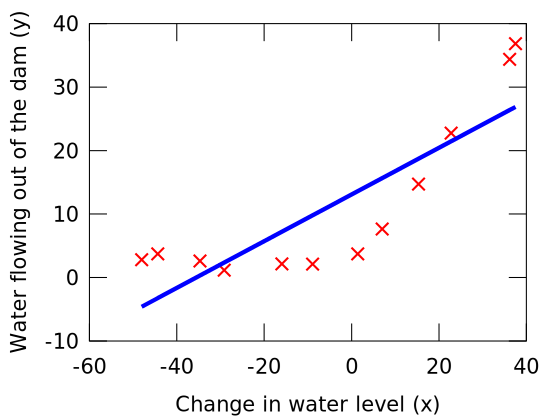

In [30]:
clear
load ('ex5data1.mat');

% m = Number of examples
m = size(X, 1);
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

%  Plot fit over the data
plot(X, y, 'rx', 'MarkerSize', 3, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;


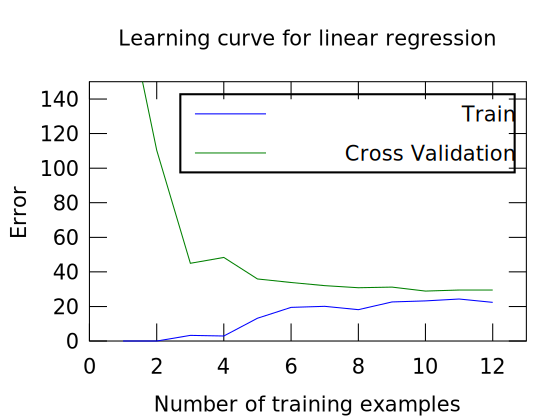

m =  12
i =  1
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 61 column 11

i =  2

i =  3

i =  4

i =  5

i =  6

i =  7

i =  8

i =  9

i =  10

i =  11

i =  12



In [31]:
clear
load ('ex5data1.mat');
lambda = 0;
m = size(X,1)
[error_train, error_val] = ...
    learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

In [ ]:
p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test(1,:)
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test]        % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];         % Add Ones


In [ ]:
%load polyFeatures.m

## polyFeatures(X,p)

In [3]:
%%file polyFeatures.m
function [X_poly] = polyFeatures(X, p)
%POLYFEATURES Maps X (1D vector) into the p-th power
%   [X_poly] = POLYFEATURES(X, p) takes a data matrix X (size m x 1) and
%   maps each example into its polynomial features where
%   X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p];
%


% You need to return the following variables correctly.
X_poly = zeros(numel(X), p);

% ====================== YOUR CODE HERE ======================
% Instructions: Given a vector X, return a matrix X_poly where the p-th 
%               column of X contains the values of X to the p-th power.
%
% 

for i = 1:p
    X_poly(:,i) = X.^i ;
end





% =========================================================================

end


Created file '/Users/jlatmann/Programming/octave/machine-learning-ex5/ex5/polyFeatures.m'.


In [32]:
polyFeatures([1 2 3 4],8)

ans =

       1       1       1       1       1       1       1       1
       2       4       8      16      32      64     128     256
       3       9      27      81     243     729    2187    6561
       4      16      64     256    1024    4096   16384   65536



## ex5 

In [ ]:
%% Machine Learning Online Class
%  Exercise 5 | Regularized Linear Regression and Bias-Variance
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     linearRegCostFunction.m
%     learningCurve.m
%     validationCurve.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
%clear ; close all; clc

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

% Load Training Data
%fprintf('Loading and Visualizing Data ...\n')

% Load from ex5data1: 
% You will have X, y, Xval, yval, Xtest, ytest in your environment
load ('ex5data1.mat');

% m = Number of examples
m = size(X, 1);

% Plot training data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

%fprintf('Program paused. Press enter to continue.\n');
%pause;

%% =========== Part 2: Regularized Linear Regression Cost =============
%  You should now implement the cost function for regularized linear 
%  regression. 
%

theta = [1 ; 1];
J = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Cost at theta = [1 ; 1]: %f '...
         '\n(this value should be about 303.993192)\n'], J);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =========== Part 3: Regularized Linear Regression Gradient =============
%  You should now implement the gradient for regularized linear 
%  regression.
%

theta = [1 ; 1];
[J, grad] = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] '...
         '\n(this value should be about [-15.303016; 598.250744])\n'], ...
         grad(1), grad(2));

fprintf('Program paused. Press enter to continue.\n');
pause;


%% =========== Part 4: Train Linear Regression =============
%  Once you have implemented the cost and gradient correctly, the
%  trainLinearReg function will use your cost function to train 
%  regularized linear regression.
% 
%  Write Up Note: The data is non-linear, so this will not give a great 
%                 fit.
%

%  Train linear regression with lambda = 0
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

%  Plot fit over the data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

fprintf('Program paused. Press enter to continue.\n');
pause;


%% =========== Part 5: Learning Curve for Linear Regression =============
%  Next, you should implement the learningCurve function. 
%
%  Write Up Note: Since the model is underfitting the data, we expect to
%                 see a graph with "high bias" -- slide 8 in ML-advice.pdf 
%

lambda = 0;
[error_train, error_val] = ...
    learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =========== Part 6: Feature Mapping for Polynomial Regression =============
%  One solution to this is to use polynomial regression. You should now
%  complete polyFeatures to map each example into its powers
%

p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

fprintf('\nProgram paused. Press enter to continue.\n');
pause;



%% =========== Part 7: Learning Curve for Polynomial Regression =============
%  Now, you will get to experiment with polynomial regression with multiple
%  values of lambda. The code below runs polynomial regression with 
%  lambda = 0. You should try running the code with different values of
%  lambda to see how the fit and learning curve change.
%

lambda = 0;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =========== Part 8: Validation for Selecting Lambda =============
%  You will now implement validationCurve to test various values of 
%  lambda on a validation set. You will then use this to select the
%  "best" lambda value.
%

[lambda_vec, error_train, error_val] = ...
    validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
	fprintf(' %f\t%f\t%f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end

fprintf('Program paused. Press enter to continue.\n');
pause;


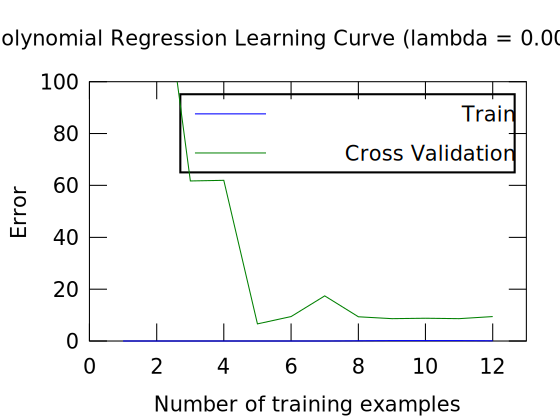

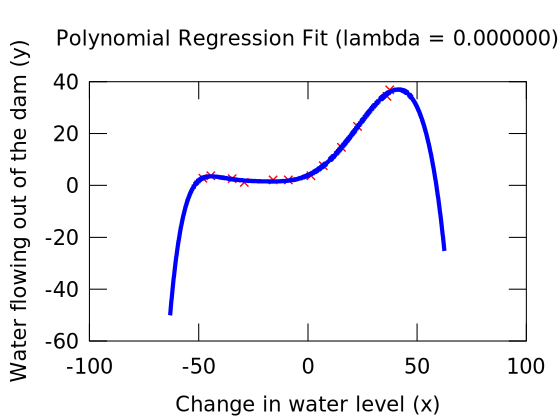


i =  1
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 61 column 11

i =  2

i =  3

i =  4

i =  5

i =  6

i =  7

i =  8

i =  9

i =  10

i =  11

i =  12



In [37]:
load ('ex5data1.mat');

% m = Number of examples
m = size(X, 1);
p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

lambda = 0;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 2, 'LineWidth', 0.4);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

In [ ]:
   X = [ones(10,1) sin(1:1.5:15)' cos(1:1.5:15)'];
  y = sin(1:3:30)';
  Xval = [ones(10,1) sin(0:1.5:14)' cos(0:1.5:14)'];
  yval = sin(1:10)';
 [X_poly] = polyFeatures(X(2,:)', 8)

In [34]:
%load validationCurve.m

##  validationCurve(X, y, Xval, yval -> [lambda_vec, error_train, error_val]

In [36]:
%%file validationCurve.m
function [lambda_vec, error_train, error_val] = ...
    validationCurve(X, y, Xval, yval)
%VALIDATIONCURVE Generate the train and validation errors needed to
%plot a validation curve that we can use to select lambda
%   [lambda_vec, error_train, error_val] = ...
%       VALIDATIONCURVE(X, y, Xval, yval) returns the train
%       and validation errors (in error_train, error_val)
%       for different values of lambda. You are given the training set (X,
%       y) and validation set (Xval, yval).
%

% Selected values of lambda (you should not change this)
lambda_vec = [0 0.001 0.003 0.01 0.03 0.1 0.3 1 3 10]';

% You need to return these variables correctly.
error_train = zeros(length(lambda_vec), 1);
error_val = zeros(length(lambda_vec), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Fill in this function to return training errors in 
%               error_train and the validation errors in error_val. The 
%               vector lambda_vec contains the different lambda parameters 
%               to use for each calculation of the errors, i.e, 
%               error_train(i), and error_val(i) should give 
%               you the errors obtained after training with 
%               lambda = lambda_vec(i)
%
% Note: You can loop over lambda_vec with the following:
%
%       for i = 1:length(lambda_vec)
%           lambda = lambda_vec(i);
%           % Compute train / val errors when training linear 
%           % regression with regularization parameter lambda
%           % You should store the result in error_train(i)
%           % and error_val(i)
%           ....
%           
%       end
%
%
for i = 1:length(lambda_vec)
    i
    lambda = lambda_vec(i);
    theta = trainLinearReg(X,y,lambda);
    
    % lambda and regularization only used in training theta
    
    error_train(i) = linearRegCostFunction(X,y,theta, 0)(1);
    error_val(i) = linearRegCostFunction(Xval,yval,theta, 0)(1);
end


% =========================================================================

end


Created file '/Users/jlatmann/Programming/octave/machine-learning-ex5/ex5/validationCurve.m'.
